In [49]:
import numpy as np
import cv2 # OpenCV-Python
import pandas as pd
from pandas import Series
%matplotlib inline
import matplotlib.pyplot as plt


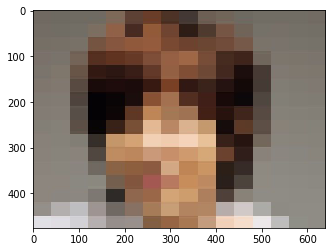

In [50]:
img = cv2.imread('../../img/moza2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #ここ！！
plt.plot(), plt.imshow(img)
plt.show()

# 格子画像を作成

In [51]:
from PIL import Image

def make_image(masksize, filename):
    picturesize = 2+masksize+masksize-1+2
    screen = (picturesize, picturesize)

    img = Image.new('RGB', screen, (0xff,0xff,0xff))

    pix = img.load()

    for i in range(2,picturesize,masksize-1):
        for j in range(2,picturesize,masksize-1):
            for k in range(0,picturesize):
                pix[i, k] = (0,0,0)
                pix[k, j] = (0,0,0)

    img.save(filename)
    return

for i in range(8, 20+1):
    make_image(i, "pattern"+str(i)+"x"+str(i)+".png")

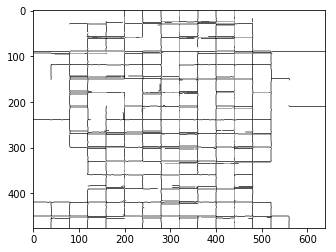

In [52]:
img_rgb = img

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY) #グレースケールに
img_gray = cv2.Canny(img_gray,10,20) #エッジ検出
img_gray = 255-img_gray #白黒反転
img_gray = cv2.GaussianBlur(img_gray,(3,3),0) #少しぼかす

cv2.imwrite('output_gray.png', img_gray)
plt.plot(), plt.imshow(img_gray,'gray')
plt.show()

# マッチする箇所をぼかす

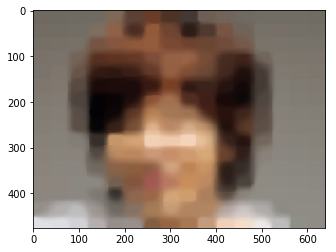

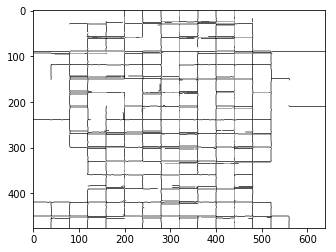

In [53]:
for i in range(8,20+1):
    pattern_filename = "pattern"+str(i)+"x"+str(i)+".png"
    template = cv2.imread(pattern_filename, 0)
    w, h = template.shape[::-1]
#     print("w:",w)
#     print("h:",h)

    img_kensyutu_kekka = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
    threshold = 0.3
    loc = np.where(img_kensyutu_kekka >= threshold)
    for pt in zip(*loc[::-1]):        
#         cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,255,255), 1)
#         cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,255,255), -1) #25 * 25で白で埋める
        img_rgb[pt[1]:pt[1] + h, pt[0]:pt[0] + w] = cv2.medianBlur(img_rgb[pt[1]:pt[1] + h, pt[0]:pt[0] + w],5)
        img_rgb[pt[1]:pt[1] + h, pt[0]:pt[0] + w] = cv2.GaussianBlur(img_rgb[pt[1]:pt[1] + h, pt[0]:pt[0] + w],(5,5),0)
    cv2.imwrite('output_progress_'+str(i)+'.png', img_rgb)

cv2.imwrite('output_result.png', img_rgb)

plt.plot(), plt.imshow(img_rgb)
plt.show()
plt.plot(), plt.imshow(img_gray,'gray')
plt.show()
